Para la obtencion de un mejor resultado en la integracion es mejor utilizar la aproximacion de segundo orden y con varias variables, como se vio en clase:
$$\vec y_{n+1} = \vec y_n + h\vec f + \frac{1}{2}h^2 \left(\frac{\partial \vec f}{\partial x} + \mathbb{J}\vec f \right)$$
Donde $f$ es $f(x_n,\vec y_n)$ y $\mathbb{J}$ el Jacobiano de la correspondiente funcion evaluado en $(x_n,\vec y_n)$ y el orden del error es $O(h^2)$

In [2]:
from pylab import *
%matplotlib inline

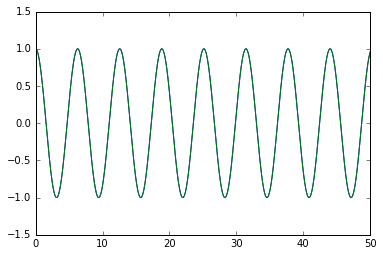

In [3]:
def integra2(ec,d_ec,p_ini,x,h=0.1):
    #f=ec(p_ini)
    #df=d_ec(p_ini)[0] #numero de ecuaciones diferenciales
    tiempos=arange(x[0],x[1]+h,h)
    sol=zeros((len(tiempos),len(p_ini)))
    sol[0,:]=p_ini
    for i in xrange(len(tiempos)-1):
        f=ec(sol[i,:],tiempos[i]) #evaluando en el i-esimo
        df,jac=d_ec(sol[i,:],tiempos[i])
        sol[i+1,:]=sol[i,:]+h*f+(0.5*h*h*(df+dot(jac,f))) #cero no esta involucrado, esta en cuenta en p_ini
    #jn1=yn+(h*f)+(0.5*h*h*(jac[0]+dot(jac[1],f))) #jac[0] regresa vector mientras jac[n] una matriz
    return tiempos,sol
def prueba(y,t):
    return array([y[1],-y[0]])
def d_prueba(y,t):
    return array([0,0]),array([[0,1],[-1,0]])
t,y=integra2(prueba,d_prueba,[1,0],[0,50],0.01) #integrando de [0,1]
#plot(y[:,0],y[:,1]) #espacio fase
plot(t,y[:,0],t,cos(t))
show()

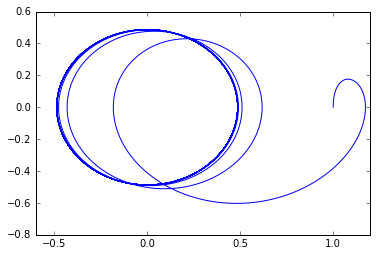

In [11]:
def p(y,t): #y[0]=y, y[1]=u
    return array([y[1],-2*y[1]-0.5*sin(y[0])+cos(t)])
def dp(y,t):
    return array([0,cos(t)]),array([[0,1],[-0.5*cos(y[0]),-2]])
t,y=integra2(p,dp,[1,0],[0,100],0.01)
plot(y[:,0],y[:,1])

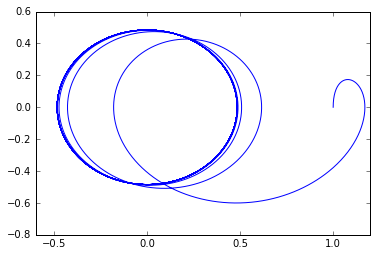

In [5]:
def rk2(ec,p_ini,x,h=0.1): #Runge Kutta de segundo orden
    tiempos=arange(x[0],x[1]+h,h)
    sol=zeros((len(tiempos),len(p_ini)))
    sol[0,:]=p_ini
    for i in xrange(len(tiempos)-1):
        k=h*ec(sol[i,:],tiempos[i])
        f=ec(sol[i,:]+0.5*k,tiempos[i]+0.5*h) #evaluando en el i-esimo
        sol[i+1,:]=sol[i,:]+h*f #cero no esta involucrado, esta en cuenta en p_ini
    return tiempos,sol
t,y=rk2(p,[1,0],[0,100],0.01)
plot(y[:,0],y[:,1])

In [6]:
x=zeros([2,6])
print x
x[1,1]=3
x[0,1]=9
print x
print x[:,1] #: significa toda la region
print x[1,:]*8
print type(x[1,:])

[[ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]]
[[ 0.  9.  0.  0.  0.  0.]
 [ 0.  3.  0.  0.  0.  0.]]
[ 9.  3.]
[  0.  24.   0.   0.   0.   0.]
<type 'numpy.ndarray'>


In [7]:
a=array([2,6])
b=[2,6]
print a,b
print 2*a,2*b

[2 6] [2, 6]
[ 4 12] [2, 6, 2, 6]


In [8]:
A=array([[1,0],[0,1]]) #entradas de matriz
B=matrix([[1,0],[0,1]])
print A
print B
print A*b
print dot(B,b),dot(B,b)

[[1 0]
 [0 1]]
[[1 0]
 [0 1]]
[[2 0]
 [0 6]]
[[2 6]] [[2 6]]


In [9]:
A=array([[1,2],[3,4]])
a=array([6,7])
print A[0,0],A[0,1],A[1,0],A[1,1]
print A*a #solo multiplica el arreglo a a cada renglon de la matriz A

1 2 3 4
[[ 6 14]
 [18 28]]


In [10]:
print dot(A,a)[1] #matriz con vector no se debe de definir, por lo contrario, el dot(,) 
#se debe hacer la matriz y el vector como arreglos. El [] para obtener las coordenadas de la matrz

46
